In [41]:
import numpy
import numpy as np
import pandas
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans

inline_rc = dict(mpl.rcParams)

CARGAMOS LOS DATOS DE yelp_academic_dataset_review.json

In [42]:
reviews = []
with open('data/yelp_academic_dataset_review.json') as fl:
    i=0
    for review in fl:
        reviews.append(json.loads(review))
        i+=1
        if i + 1 > 100:
            break

df_review = pd.DataFrame(reviews)
print(df_review.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

CARGAMOS LOS DATOS DE yelp_academic_dataset_business.json

In [43]:
business = []
with open('data/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        business.append(json.loads(line))

df_business = pd.DataFrame(business)
print(df_business.head())



              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

ELIMINAMOS LAS COLUMNAS INNECESARIAS

COMPROBAMOS

In [44]:
df_review = df_review.drop(["review_id", "user_id","business_id", "useful", "funny", "cool", "date","stars"], axis=1)
#df_business = df_business.drop(["name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "hours"], axis=1)

In [45]:
print(df_review.head())
print(df_review.tail())
#print(df_business.head())

                                                text
0  If you decide to eat here, just be aware it is...
1  I've taken a lot of spin classes over the year...
2  Family diner. Had the buffet. Eclectic assortm...
3  Wow!  Yummy, different,  delicious.   Our favo...
4  Cute interior and owner (?) gave us tour of up...
                                                 text
95  Had to wait until my third trip to NOLA to act...
96  A GREAT EXPERIENCE!!!!!!!!!  I was a completel...
97  Wow! I never thought my sons phone could be re...
98  Service and management terrible... After messi...
99  I have been to a number of dog friendly hotels...


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer()
lemma = WordNetLemmatizer()

X = []
for r in df_review["text"]: #Por cada review
    txt = word_tokenize(r.lower()) #Separa la review en palabras
    newtxt = ""
    for w in txt: #Por cada palabra en txt
        l = lemma.lemmatize(w) #se hace lo de quitar mayusculas y quitar raice y eso
        newtxt += l+" "
    X.append(newtxt)

X = vectorizer.fit_transform(X)
print(X)

  (0, 1277)	0.14197577306859072
  (0, 480)	0.10583945562599929
  (0, 1125)	0.08798308701762234
  (0, 1760)	0.11554509656441746
  (0, 1110)	0.05556299177431075
  (0, 1329)	0.08024493317544461
  (0, 1123)	0.0785961818641601
  (0, 457)	0.12198173813855517
  (0, 84)	0.09859021679419566
  (0, 638)	0.045857350835892596
  (0, 1120)	0.14197577306859072
  (0, 1739)	0.12198173813855517
  (0, 1753)	0.0928018113775227
  (0, 1497)	0.12198173813855517
  (0, 1769)	0.11554509656441746
  (0, 973)	0.08798308701762234
  (0, 1652)	0.14829932004756793
  (0, 1217)	0.12198173813855517
  (0, 1708)	0.21167891125199859
  (0, 1817)	0.14197577306859072
  (0, 1741)	0.130280012396411
  (0, 1133)	0.07414966002378397
  (0, 335)	0.09555106163438189
  (0, 940)	0.19718043358839132
  (0, 1725)	0.12399926669689694
  :	:
  (99, 512)	0.062307841243599976
  (99, 1774)	0.05570013266698154
  (99, 1654)	0.059795707033239234
  (99, 1070)	0.04440418024529248
  (99, 117)	0.07810135218146999
  (99, 1099)	0.07600794016643021
  (99, 

In [47]:
X= X.toarray()
X=pd.DataFrame(X)
#X=np.array(X, dtype=object)
print(X)

    0         1     2     3     4     5     6     7     8     9     ...  1815  \
0    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3    0.0  0.173951   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..   ...       ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
95   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
96   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
97   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
98   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
99   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

        1816      1817     

In [48]:
from sklearn.decomposition import PCA

#Antes de aplicar el método de clasificación utilizamos PCA para reducir el número de atributos
print('Dim originally: ',X.shape)
#Como vamos a representar gráficamente los clusters, nos quedaremos con los 2 atributos más imporantes
pca = PCA(n_components=2)
pca.fit(X)
# Cambio de base a dos dimensiones PCA
X = pca.transform(X)
print('Dim after PCA: ',X.shape)
print(X)


Dim originally:  (100, 1825)
Dim after PCA:  (100, 2)
[[ 0.2729686  -0.04985103]
 [ 0.10181903 -0.19448778]
 [-0.23364241 -0.0451812 ]
 [-0.05050206 -0.06401628]
 [-0.13790895  0.09011614]
 [ 0.02203287 -0.1455301 ]
 [ 0.08551375  0.07280551]
 [-0.29286937 -0.01198434]
 [ 0.05934901 -0.14435341]
 [ 0.05735944  0.27865342]
 [ 0.13202352  0.09424285]
 [-0.08893095 -0.06991625]
 [-0.06344898 -0.10227915]
 [-0.03472455  0.13657613]
 [ 0.05091422 -0.05826085]
 [-0.2438937   0.12716938]
 [-0.07726127  0.00140584]
 [ 0.20388035 -0.00294967]
 [-0.06557257 -0.06143283]
 [ 0.10283714 -0.11563974]
 [-0.1240285  -0.07877493]
 [ 0.06725175  0.08561616]
 [-0.15254663 -0.12470358]
 [ 0.07883013 -0.2388399 ]
 [ 0.37378782  0.0248699 ]
 [-0.21631     0.15956561]
 [-0.24144381  0.18015496]
 [-0.1244467   0.11093984]
 [-0.01177221  0.23614074]
 [ 0.12608876 -0.00177004]
 [-0.01024489  0.0310274 ]
 [-0.15492542 -0.11763589]
 [-0.21040847 -0.28604273]
 [-0.1163432   0.08806382]
 [ 0.08908657 -0.16682267]
 

In [49]:
#X = pd.DataFrame(X)
#print(X[0][0])

In [50]:
class Distance_computation_grid(object):

#De aquí por ahora solo utilizamos compute distant y distance calculate para solamente crear la matriz de distancias
#Para simplificar un poco lo de juntar instancias hago la matriz entera llena

    def __init__(self):
        pass

    def compute_distance(self,samples):

        Distance_mat = np.zeros((len(samples),len(samples))) #Hace una matriz de 10000*10000
        terminado = False
        i = 0
        j = 0

        '''while not terminado:
            while i <= j and j < len(sample) :
                j = i
                if i!=j:

                elif i == j:
                    Distance_mat[i,j] = 10**4
                j+=1

            terminado = True'''

        for i in range(Distance_mat.shape[0]):
            for j in range(i,Distance_mat.shape[0]):
                if i!=j:#Solo calcula distancias en una mitad de la matriz
                    distancia = float(self.distance_calculate(samples[i],samples[j])) #Distancia entrela muestra i e j
                    Distance_mat[i,j] = distancia #Meto en la matriz la distancia do vece
                    Distance_mat[j,i] = distancia
                elif i == j:
                    Distance_mat[i,j] = 10**4 #Pone un valor muy grande para que nunca salga como la distancia más pequeña entrela misma instancia
        return Distance_mat


    def distance_calculate(self,sample1,sample2):

        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                    dist.append(abs(sample1[i][0]-sample2[j][0])+abs(sample1[i][1]-sample2[j][1]))
        return np.min(dist)


#Esto no se usa para nada lo he dejado más que nada por si había algo que nos interesaba de aquí.

    def intersampledist(self,s1,s2):
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(abs(s1[i][0]-s2[j][0])+abs(s1[i][1]-s2[j][1]))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(abs(s1[i][0]-s2[j][0])+abs(s1[i][1]-s2[j][1]))
        return min(dist)

    def centroide(self,sample):
        if(len(sample) == 1):
            return np.mean()
        else:
            sample1=sample[0]
            i=1
            while i < len(sample):
                dist.append(abs(s1[i][0]-s2[j][0])+abs(s1[i][1]-s2[j][1]))

        return np.mean(dist)

    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [51]:
#Aquí básicamente se hace la matriz de distancias osea aquí no creo que e cambie nada
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

print('Sample size before clustering    :- ',m)
Distance_mat      = distcal.compute_distance(samples)
print(Distance_mat)
dist_mat = pd.DataFrame(Distance_mat)
print(dist_mat)

Sample size before clustering    :-  100
[[1.00000000e+04 3.15786320e-01 5.11280830e-01 ... 3.04148046e-01
  4.76120004e-01 2.58021584e-01]
 [3.15786320e-01 1.00000000e+04 4.84768005e-01 ... 2.77635221e-01
  4.49607179e-01 3.31174357e-01]
 [5.11280830e-01 4.84768005e-01 1.00000000e+04 ... 2.19050058e-01
  3.94191387e-01 5.17329219e-01]
 ...
 [3.04148046e-01 2.77635221e-01 2.19050058e-01 ... 1.00000000e+04
  1.75141329e-01 2.98279161e-01]
 [4.76120004e-01 4.49607179e-01 3.94191387e-01 ... 1.75141329e-01
  1.00000000e+04 2.18098420e-01]
 [2.58021584e-01 3.31174357e-01 5.17329219e-01 ... 2.98279161e-01
  2.18098420e-01 1.00000000e+04]]
              0             1             2             3             4   \
0   10000.000000      0.315786      0.511281      0.337636      0.550845   
1       0.315786  10000.000000      0.484768      0.282793      0.524332   
2       0.511281      0.484768  10000.000000      0.201975      0.231031   
3       0.337636      0.282793      0.201975  10000.000

In [52]:
#Aquí se busca la distancia más pequeña y se devuelven los índices
minimos=np.matrix(dist_mat).argmin(axis = 1).tolist() #coordenadas x del valor minimo de cada fila. En dataframe es x,y, es decir en elprimer [] van las filas y en el segun do [] van las columnas
print(minimos)#Aquí te imprime las coordenadas de cada fila para que veas que formato tiene
minn=dist_mat[minimos[0][0]][0] #Aquí simplemente guardo el minimo de la primera fila, los [][] en minimos es porque argmin devuelve un array de arrays
print(minn)
y=0 #la coordenada y del elemento más pequeño de la primera fila
x=minimos[0][0] #la coordenada x del elemento más pequeño de la primera fila
for i in range(1,len(minimos)-1): #Para cada minimo en la lista de minimos
    if dist_mat[minimos[i][0]][i] < minn: #Si el mínimo de esa fila es más pequeño que el minimo actual
        minn=dist_mat[minimos[i][0]][i] #Se guarda el nuevo minimo junto a sus coordenadas.
        x=minimos[i][0]
        y=i
print('---------------------------------')
print(x)
print(y)
print(minn)

[[72], [77], [39], [18], [33], [8], [21], [71], [5], [50], [99], [18], [45], [98], [92], [26], [87], [95], [3], [75], [59], [6], [31], [52], [73], [26], [25], [33], [90], [55], [38], [22], [54], [4], [1], [89], [64], [91], [30], [54], [70], [16], [49], [22], [61], [12], [62], [85], [67], [42], [9], [50], [23], [93], [39], [96], [54], [38], [13], [74], [75], [44], [46], [75], [68], [85], [88], [48], [64], [15], [40], [7], [0], [95], [59], [63], [36], [1], [94], [81], [57], [79], [91], [29], [13], [65], [33], [89], [66], [87], [28], [37], [91], [53], [78], [73], [55], [35], [13], [10]]
0.005457501644912495
---------------------------------
95
73
0.004338184991358989


In [53]:
#Aquí lo que estuve haciendo es intentar hacer la primera iteración de la matriz que genere con los primerass 5 instancias de datosExperimentos
#Recomiendo ver https://youtu.be/YH0r47m0kFM
nodo1 = dist_mat[y] #En el nodo1 guardo la columna 0
nodo2 = dist_mat[x] #En el nodo2 guardo la columna 4 (son las coordenadas del mininmo mas que na)
print(nodo1)
print(nodo2)
print(dist_mat[y][x])
eliminado = False #Un booleano para borrar solo una vez el minimo ya que sale do veces la pareja de 10000 y el minimo
nuevaFila = [] #Aqui voy a guardar las distancias nuevas obtenidas por complete link, es decir, de cada pareja de distancias te quedas con la más grande
for samples in range(1,len(dist_mat)):
    print('iteración número:', samples)
    #Primero miramos el minimo
    minimos=np.matrix(dist_mat).argmin(axis = 1).tolist()

    minn=dist_mat.iloc[minimos[0][0],0]
    y=0
    x=minimos[0][0]
    print(minn)
    for i in range(1,len(minimos)-1):

        if dist_mat.iloc[minimos[i][0],i] < minn:
            minn=dist_mat.iloc[minimos[i][0],i]
            x=minimos[i][0]
            y=i
    print(minn)
    print(x)
    print(y)
    nodo1 = dist_mat.iloc[y].array
    nodo2 = dist_mat.iloc[x].array
    eliminado = False
    nuevaFila = []
    for i in range(0,len(dist_mat)):
        if((nodo1[i]==minn or nodo2[i]==minn) and not eliminado):
            nuevaFila.append(float(10**4))
            eliminado = True
        elif((nodo1[i]==minn or nodo2[i]==minn) and eliminado):
            print()
        elif(nodo1[i]>=nodo2[i]):
                nuevaFila.append(float(nodo1[i]))
        else:
                nuevaFila.append(float(nodo2[i]))

    if x>y:
        label = str(dist_mat.columns[y]) + '-' + str(dist_mat.columns[x])
        print(label)
        dist_mat = dist_mat.drop([dist_mat.iloc[x].name] ,axis=1) #Quito las filas y columnas de las instancias que se han mergeado
        dist_mat = dist_mat.drop([dist_mat.iloc[x].name] ,axis=0)
        dist_mat = dist_mat.rename({dist_mat.iloc[y].name:  label}, axis='columns')
        dist_mat = dist_mat.rename({dist_mat.iloc[y].name:  label}, axis='rows')
    else:
        label = str(dist_mat.columns[y]) + '-' + str(dist_mat.columns[x])
        dist_mat = dist_mat.drop([dist_mat.iloc[y].name] ,axis=1) #Quito las filas y columnas de las instancias que se han mergeado
        dist_mat = dist_mat.drop([dist_mat.iloc[y].name],axis=0)
        dist_mat = dist_mat.rename({dist_mat.iloc[x].name:  label}, axis='columns')
        dist_mat = dist_mat.rename({dist_mat.iloc[x].name:  label}, axis='rows')

    print(dist_mat)
    dist_mat.loc[label]=nuevaFila
    dist_mat.loc[:, label]=nuevaFila
    print('La matriz de distancias después de la iteración', samples)
    print(dist_mat)

dist_mat

0     0.094428
1     0.324963
2     0.511118
3     0.346812
4     0.456416
        ...   
95    0.004338
96    0.087780
97    0.292068
98    0.381692
99    0.163593
Name: 73, Length: 100, dtype: float64
0         0.098767
1         0.322790
2         0.508945
3         0.344639
4         0.452078
          ...     
95    10000.000000
96        0.083442
97        0.289894
98        0.377353
99        0.159255
Name: 95, Length: 100, dtype: float64
0.004338184991358989
iteración número: 1
0.005457501644912495
0.004338184991358989
95
73

73-95
              0             1             2             3             4   \
0   10000.000000      0.315786      0.511281      0.337636      0.550845   
1       0.315786  10000.000000      0.484768      0.282793      0.524332   
2       0.511281      0.484768  10000.000000      0.201975      0.231031   
3       0.337636      0.282793      0.201975  10000.000000      0.241539   
4       0.550845      0.524332      0.231031      0.241539  10000.000000  

,0-72-24-6-21-80-30-38-57-10-99-44-61-47-65-85-78-94-79-81-14-92-37-91-82-29-83-17-73-95-55-96-9-50-28-90-42-49-51-1-77-34-23-52-19-63-75-60-46-62-53-93-3-18-11-12-45-16-35-87-89-97-5-8-36-64-68-66-88-76-2-39-54-20-59-74-22-31-43-32-7-71-56-4-33-27-86-41-48-67-13-98-84-58-40-70-15-25-26-69
0-72-24-6-21-80-30-38-57-10-99-44-61-47-65-85-78-94-79-81-14-92-37-91-82-29-83-17-73-95-55-96-9-50-28-90-42-49-51-1-77-34-23-52-19-63-75-60-46-62-53-93-3-18-11-12-45-16-35-87-89-97-5-8-36-64-68-66-88-76-2-39-54-20-59-74-22-31-43-32-7-71-56-4-33-27-86-41-48-67-13-98-84-58-40-70-15-25-26-69,10000.0


In [54]:
dist_mat.loc[label]=nuevaFila
dist_mat.loc[:, label]=nuevaFila

dist_mat

,0-72-24-6-21-80-30-38-57-10-99-44-61-47-65-85-78-94-79-81-14-92-37-91-82-29-83-17-73-95-55-96-9-50-28-90-42-49-51-1-77-34-23-52-19-63-75-60-46-62-53-93-3-18-11-12-45-16-35-87-89-97-5-8-36-64-68-66-88-76-2-39-54-20-59-74-22-31-43-32-7-71-56-4-33-27-86-41-48-67-13-98-84-58-40-70-15-25-26-69
0-72-24-6-21-80-30-38-57-10-99-44-61-47-65-85-78-94-79-81-14-92-37-91-82-29-83-17-73-95-55-96-9-50-28-90-42-49-51-1-77-34-23-52-19-63-75-60-46-62-53-93-3-18-11-12-45-16-35-87-89-97-5-8-36-64-68-66-88-76-2-39-54-20-59-74-22-31-43-32-7-71-56-4-33-27-86-41-48-67-13-98-84-58-40-70-15-25-26-69,10000.0


In [55]:
"""
sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
value_to_add      = samples.pop(sample_ind_needed[1])
samples[sample_ind_needed[0]].append(value_to_add)

print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])

progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
v = progression.pop(sample_ind_needed[1])
m = len(samples)

print('Progression(Current Sample)      :-',progression)
print('Cluster attained                 :-',progression[sample_ind_needed[0]])
print('Sample size after clustering     :-',m)
print('\n')
"""

"\nsample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]\nvalue_to_add      = samples.pop(sample_ind_needed[1])\nsamples[sample_ind_needed[0]].append(value_to_add)\n\nprint('Cluster Node 1                   :-',progression[sample_ind_needed[0]])\nprint('Cluster Node 2                   :-',progression[sample_ind_needed[1]])\n\nprogression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])\nprogression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]\nv = progression.pop(sample_ind_needed[1])\nm = len(samples)\n\nprint('Progression(Current Sample)      :-',progression)\nprint('Cluster attained                 :-',progression[sample_ind_needed[0]])\nprint('Sample size after clustering     :-',m)\nprint('\n')\n"

[0, 0, 2, 3, 4, 0, 3, 7, 0, 0, 3, 3, 3, 3, 0, 7, 16, 0, 3, 0, 3, 3, 22, 0, 0, 7, 7, 4, 0, 0, 30, 22, 7, 4, 0, 3, 22, 3, 30, 2, 3, 16, 0, 22, 3, 3, 0, 3, 4, 0, 0, 0, 0, 0, 2, 0, 7, 3, 3, 3, 0, 3, 0, 0, 22, 3, 0, 4, 22, 7, 3, 7, 0, 0, 3, 0, 22, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3]


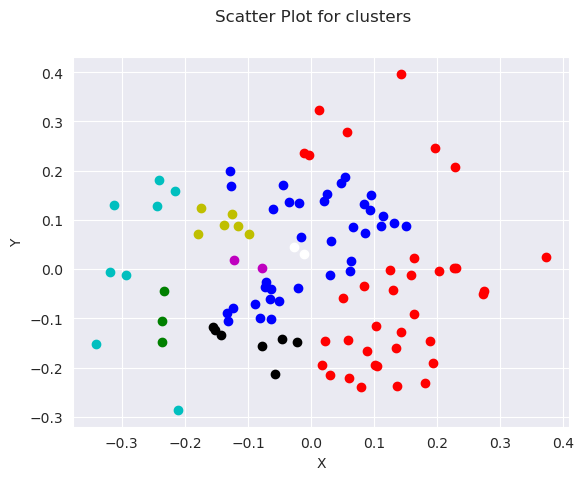

None


In [56]:
import sys
from sklearn.metrics.pairwise import pairwise_distances
def hierarchical_clustering(data,linkage,no_of_clusters):
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    color = ['r','g','b','y','c','m','k','w']
    initial_distances = pairwise_distances(data,metric='euclidean')
    #making all the diagonal elements infinity
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage)

    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)

    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0

    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1

    plt.show()


def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []


    for n in range(input.shape[0]):
        array.append(n)

    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize

        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j

        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points

        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp

        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid

        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize

        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters

        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()

    return clusters
clusters = hierarchical_clustering(X,1,2)
print(clusters)

In [57]:
# Import the f
print(clusters)

None


In [58]:
# cluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(X, method = 'ward', metric = 'euclidean')

In [59]:
distance_matrix

array([[7.30000000e+01, 9.50000000e+01, 3.43091879e-03, 2.00000000e+00],
       [1.00000000e+00, 7.70000000e+01, 3.66968626e-03, 2.00000000e+00],
       [0.00000000e+00, 7.20000000e+01, 4.51917245e-03, 2.00000000e+00],
       [2.20000000e+01, 3.10000000e+01, 7.45726997e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.00076220e-02, 2.00000000e+00],
       [8.70000000e+01, 8.90000000e+01, 1.06560051e-02, 2.00000000e+00],
       [7.80000000e+01, 9.40000000e+01, 1.41611060e-02, 2.00000000e+00],
       [2.00000000e+01, 5.90000000e+01, 1.44399557e-02, 2.00000000e+00],
       [7.90000000e+01, 8.10000000e+01, 1.46379560e-02, 2.00000000e+00],
       [6.50000000e+01, 8.50000000e+01, 1.48497020e-02, 2.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.52903403e-02, 2.00000000e+00],
       [1.30000000e+01, 9.80000000e+01, 1.59169437e-02, 2.00000000e+00],
       [3.50000000e+01, 1.05000000e+02, 1.62321544e-02, 3.00000000e+00],
       [1.20000000e+01, 4.50000000e+01, 1.75258949e

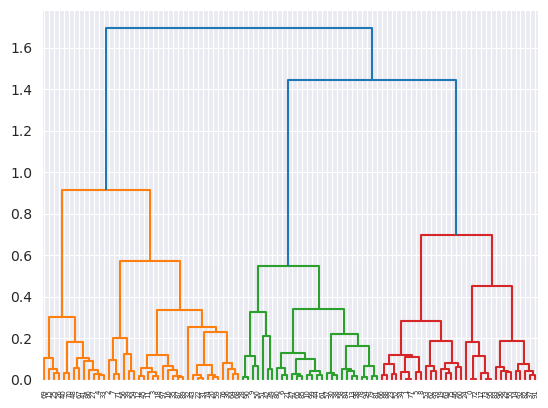

In [60]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()